# COE782- ML - Lista1 -Parte prática

## Experimento "Polynomial Curve Fitting"
Aluno: Vivian de Carvalho Rodrigues

### a) Simulação das figuras 1.4 e 1.6 - Bishop

In [1]:
#Experimento computacional "Polynomial Curve Fiting" do livro Pattern Recognition (Bishop)
#Lista 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#import math as m

#função exata
x =  np.arange(0., 1., 0.01)     
y_f = np.sin(2*np.pi*x)

#a) primeira parte do problema
#gera dados com ruido
N = 10                                                                       #quantidade de registros dos dados de entrada
X = np.random.rand(N, 1)                                                     #dados de entrada
mu = 0.                                                                      #média
std = 0.3                                                                    #desvio padrão
epsilon = np.random.default_rng().normal(loc=mu, scale=std, size=(N, 1) )    #ruido branco
t = np.sin(2*np.pi*X) + epsilon                                              #targets

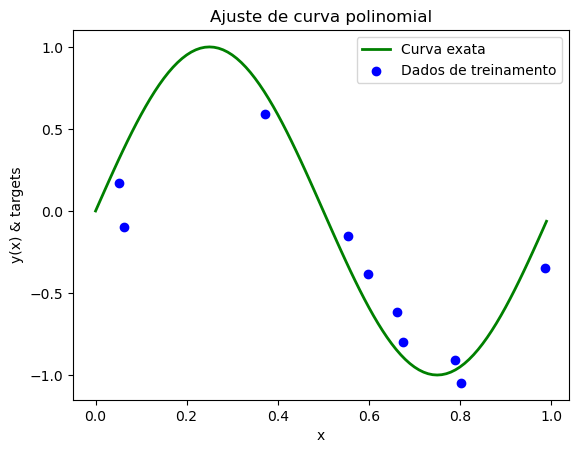

In [2]:
# Plot do problema
plt.plot(x, y_f, color="green", linewidth=2, label = "Curva exata")
plt.scatter(X, t, color="blue", label = "Dados de treinamento")
plt.xlabel("x")
plt.ylabel("y(x) & targets")
plt.legend()
plt.title("Ajuste de curva polinomial")
plt.show()

In [3]:
n = 3                                                #quantidade de modelos
M = [1, 3, 9]                                        #grau do polinomio (modelos)

intercept = np.zeros(n)
coef = np.zeros((n, max(M)))
X_new = np.arange(0., 1., 1/N).reshape(N,1) 
Y = np.zeros((n,N))

for i in range(n):
    poly_features = PolynomialFeatures(degree = M[i], include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, t)
    intercept[i] = lin_reg.intercept_                                          #vetor de intercept de cada modelo
    y_aux = lin_reg.predict(poly_features.fit_transform(X_new))
    for j in range(M[i]):
        coef[i][j] = lin_reg.coef_[0][j]                                       #matriz com os coeficientes de cada modelo
    
    for k in range(N):
        Y [i][k] =  y_aux[k][0]                                                #matriz com Y (x,w) para cada modelo

In [4]:
Y

array([[ 2.52236664e-01,  1.41989066e-01,  3.17414676e-02,
        -7.85061306e-02, -1.88753729e-01, -2.99001327e-01,
        -4.09248925e-01, -5.19496523e-01, -6.29744121e-01,
        -7.39991719e-01],
       [-5.55673277e-01,  3.66110272e-01,  7.68279959e-01,
         7.71415031e-01,  4.96094738e-01,  6.28983270e-02,
        -4.07594954e-01, -7.94805857e-01, -9.78155133e-01,
        -8.37063534e-01],
       [-3.42036792e+02, -5.57075425e+01, -1.31987883e+02,
        -4.01218158e+01,  5.45792896e+00,  1.99139724e+00,
        -3.83857735e-01, -1.10681804e+00, -9.89466617e-01,
        -2.15627109e+01]])

In [5]:
intercept

array([ 2.52236664e-01, -5.55673277e-01, -3.42036792e+02])

In [6]:
coef

array([[-1.10247598e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.22178356e+01, -3.20096555e+01,  2.00965413e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.59527194e+04, -2.60191069e+05,  1.88006568e+06,
        -7.36141895e+06,  1.71612980e+07, -2.46000761e+07,
         2.13181298e+07, -1.02613957e+07,  2.10801994e+06]])

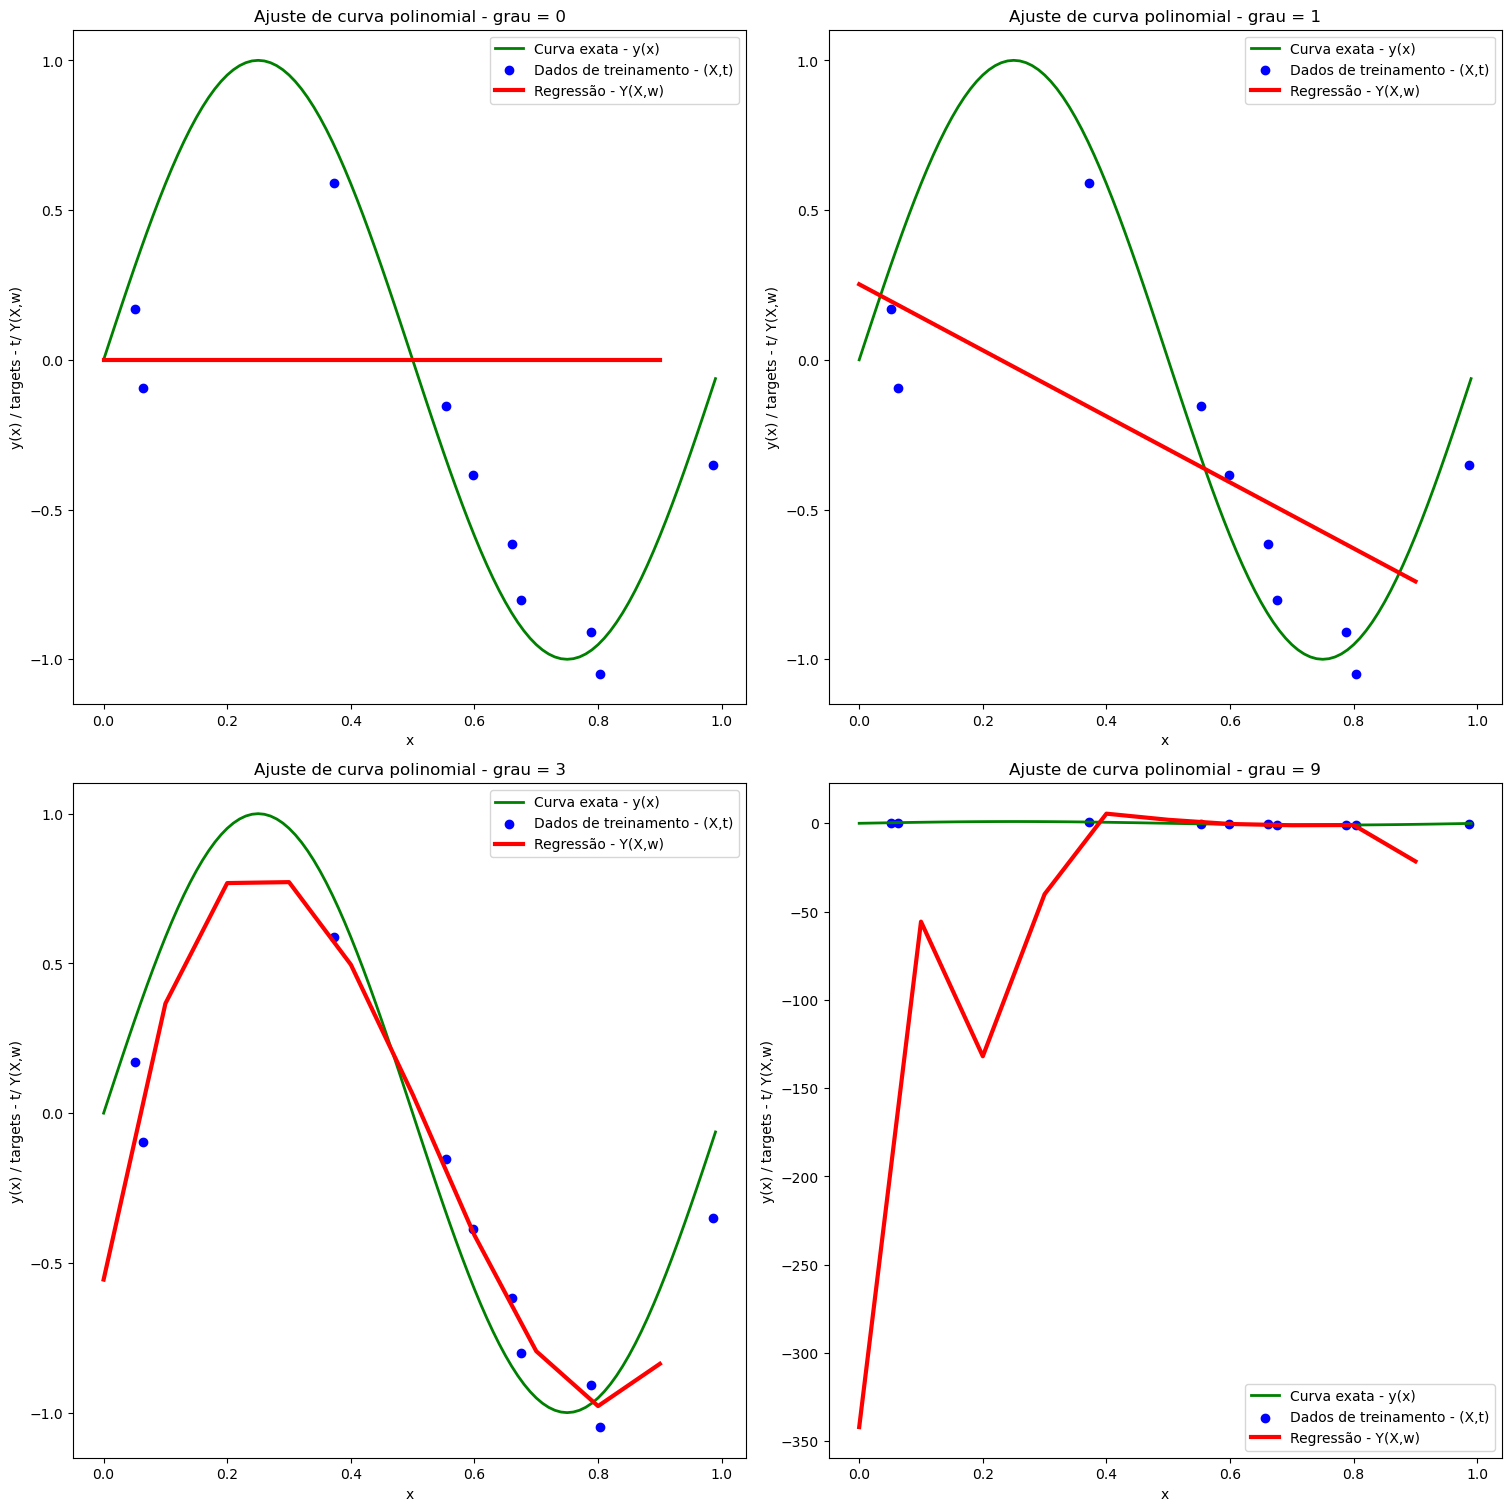

In [7]:
#Figura 1.4 Bishop
fig, axs = plt.subplots(2, 2, figsize=(15, 15), layout='constrained')

axs[0,0].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[0,0].scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs[0,0].plot(X_new, np.zeros(len(X_new)), color="red", linewidth=3, label = "Regressão - Y(X,w)") 
axs[0,0].set_xlabel("x")  
axs[0,0].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[0,0].legend()
axs[0,0].set_title("Ajuste de curva polinomial - grau = 0") 

axs[0,1].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[0,1].scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs[0,1].plot(X_new, Y[0], color="red", linewidth=3, label = "Regressão - Y(X,w)") 
axs[0,1].set_xlabel("x")  
axs[0,1].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[0,1].legend()
axs[0,1].set_title("Ajuste de curva polinomial - grau = "+str(M[0])) 

axs[1,0].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[1,0].scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs[1,0].plot(X_new, Y[1], color="red", linewidth=3, label = "Regressão - Y(X,w)") 
axs[1,0].set_xlabel("x")  
axs[1,0].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[1,0].legend()
axs[1,0].set_title("Ajuste de curva polinomial - grau = "+ str(M[1])) 

axs[1,1].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[1,1].scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs[1,1].plot(X_new, Y[2], color="red", linewidth=3, label = "Regressão - Y(X,w)") 
axs[1,1].set_xlabel("x")  
axs[1,1].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[1,1].legend()
axs[1,1].set_title("Ajuste de curva polinomial - grau = "+str(M[2])) 
plt.show()

In [8]:
#a) Segunda parte do problema

M = 9

#gera dados com ruido (15 registros)
N = 15                                                                       #quantidade de registros dos dados de entrada
X = np.random.rand(N, 1)                                                     #dados de entrada
mu = 0.                                                                      #média
std = 0.3                                                                    #desvio padrão
epsilon = np.random.default_rng().normal(loc=mu, scale=std, size=(N, 1) )    #ruido branco
t = np.sin(2*np.pi*X) + epsilon                                              #targets

In [9]:
#Definição da curva polinomial
poly_features = PolynomialFeatures(degree = M, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [10]:
#Regressão (aprendizado)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, t)
lin_reg.intercept_, lin_reg.coef_

(array([6295.75918637]),
 array([[  -130130.10544551,   1158893.27285487,  -5841540.27161985,
          18391081.89580486, -37559692.6439259 ,  49835872.11802647,
         -41490873.89456611,  19698326.70720226,  -4069369.8746801 ]]))

In [11]:
# Gera o y (x,w) estimado com os parâmetros ajustados
X_new = np.arange(0., 1., 1/N).reshape(N,1)  
Y = lin_reg.predict(poly_features.fit_transform(X_new))

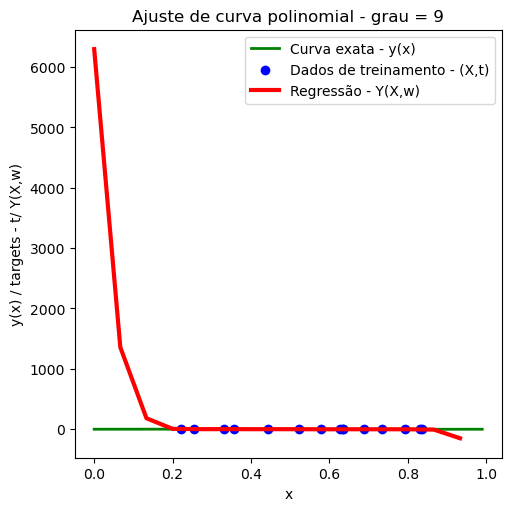

In [12]:
#Figura 1.6 Bishop
fig, axs = plt.subplots(1, 1, figsize=(5, 5), layout='constrained')

axs.plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs.scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs.plot(X_new, Y, color="red", linewidth=3, label = "Regressão - Y(X,w)") 
axs.set_xlabel("x")  
axs.set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs.legend()
axs.set_title("Ajuste de curva polinomial - grau = " +str(M)) 
plt.show()

In [13]:
#gera dados com ruido (100 registros)
N = 100                                                                       #quantidade de registros dos dados de entrada
X = np.random.rand(N, 1)                                                     #dados de entrada
mu = 0.                                                                      #média
std = 0.3                                                                    #desvio padrão
epsilon = np.random.default_rng().normal(loc=mu, scale=std, size=(N, 1) )    #ruido branco
t = np.sin(2*np.pi*X) + epsilon                                              #targets

#Definição da curva polinomial
poly_features = PolynomialFeatures(degree = M, include_bias=False)
X_poly = poly_features.fit_transform(X)


#Regressão (aprendizado)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, t)
lin_reg.intercept_, lin_reg.coef_

(array([-0.13867797]),
 array([[ 8.62184013e+00, -9.12006975e+01,  1.22925942e+03,
         -7.70924885e+03,  2.45200737e+04, -4.37000257e+04,
          4.43123391e+04, -2.38612508e+04,  5.29092854e+03]]))

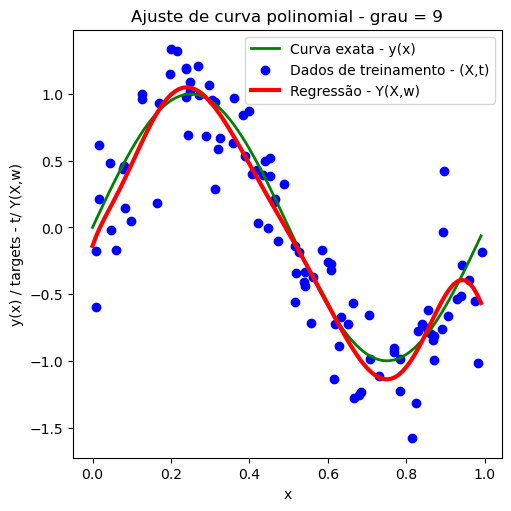

In [14]:
# Gera o y (x,w) estimado com os parâmetros ajustados
X_new = np.arange(0., 1., 1/N).reshape(N,1)  
Y = lin_reg.predict(poly_features.fit_transform(X_new))

#Figura 1.6 Bishop
fig, axs = plt.subplots(1, 1, figsize=(5, 5), layout='constrained')

axs.plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs.scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs.plot(X_new, Y, color="red", linewidth=3, label = "Regressão - Y(X,w)") 
axs.set_xlabel("x")  
axs.set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs.legend()
axs.set_title("Ajuste de curva polinomial - grau = " +str(M))
plt.show()

### b)  Dados sem relevância estatística

In [23]:
#b) Dados sem relevância estatística
#gera dados com ruido
N = 50                                                                       #quantidade de registros dos dados de entrada

#Novos dados de entrada sem relevância estatística
x_aux = np.arange(0.,0.5, 0.5/N).reshape(N,1)

mu = 0.                                                                      #média 
std = 0.5                                                                    #desvio padrão alterado
epsilon = np.random.default_rng().normal(loc=mu, scale=std, size=(N, 1) )    #ruido branco alterado 

#targets alterados para perder relevância estatística
t = np.sin(2*np.pi*x_aux) + epsilon

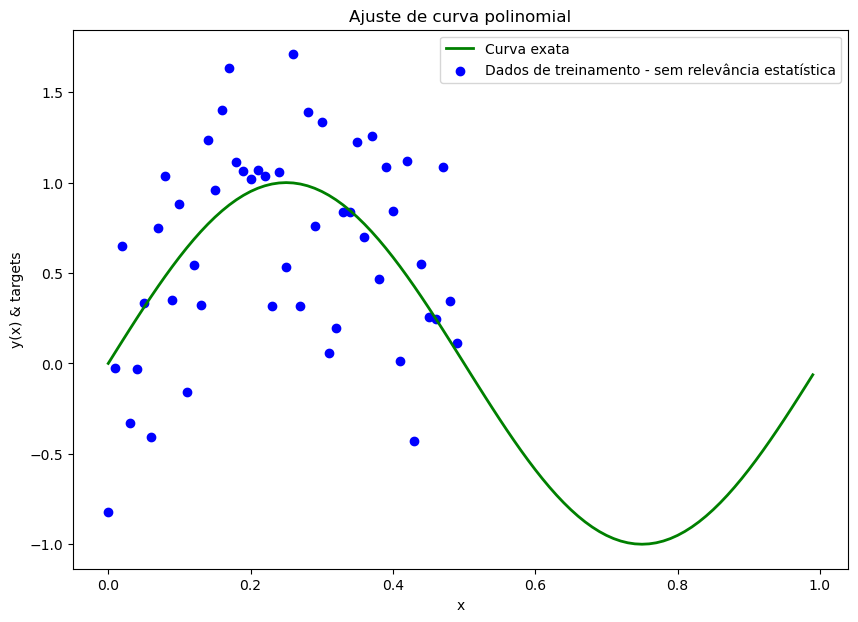

In [24]:
# Plot do problema
plt.figure (figsize=(10, 7))
plt.plot(x, y_f, color="green", linewidth=2, label = "Curva exata")
plt.scatter(x_aux, t, color="blue", label = "Dados de treinamento - sem relevância estatística")
plt.xlabel("x")
plt.ylabel("y(x) & targets")
plt.legend()
plt.title("Ajuste de curva polinomial")
plt.show()

In [25]:
#Grau do polinômio
M = 4
#Definição da curva polinomial
poly_features = PolynomialFeatures(degree = M, include_bias=False)
X_poly = poly_features.fit_transform(x_aux)

#Regressão (aprendizado)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, t)
lin_reg.intercept_, lin_reg.coef_

(array([-0.43320455]),
 array([[ 15.80985223, -55.88427279,  67.57973676, -26.36830365]]))

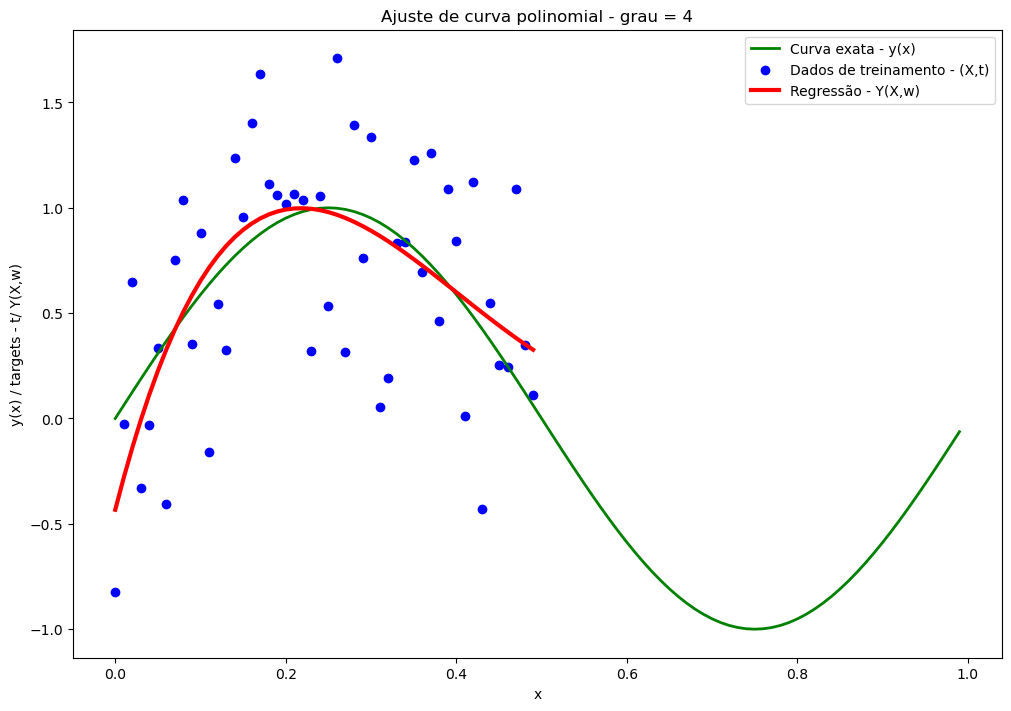

In [26]:
# Gera o y (x,w) estimado com os parâmetros ajustados
X_new = np.arange(0., 0.5, 0.5/N).reshape(N,1)  
Y = lin_reg.predict(poly_features.fit_transform(X_new))

#Figura 1.6 Bishop
fig, axs = plt.subplots(1, 1, figsize=(10, 7), layout='constrained')

axs.plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs.scatter(x_aux, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs.plot(X_new, Y, color="red", linewidth=3, label = "Regressão - Y(X,w)") 
axs.set_xlabel("x")  
axs.set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs.legend()
axs.set_title("Ajuste de curva polinomial - grau = " +str(M))
plt.show()

### c) Outlier

In [19]:
#b) Dados sem relevância estatística
#gera dados com ruido
N = 10                                                                      #quantidade de registros dos dados de entrada
X = np.random.rand(N, 1)                                                     #dados de entrada
mu = 0.                                                                      #média
std = 0.3                                                                    #desvio padrão
epsilon = np.random.default_rng().normal(loc=mu, scale=std, size=(N, 1) )    #ruido branco

#targets alterados para perder relevância estatística
t = np.sin(2*np.pi*X) + epsilon

#inclui o outlier na posição 6 do vetor do targets
t[6] = -7

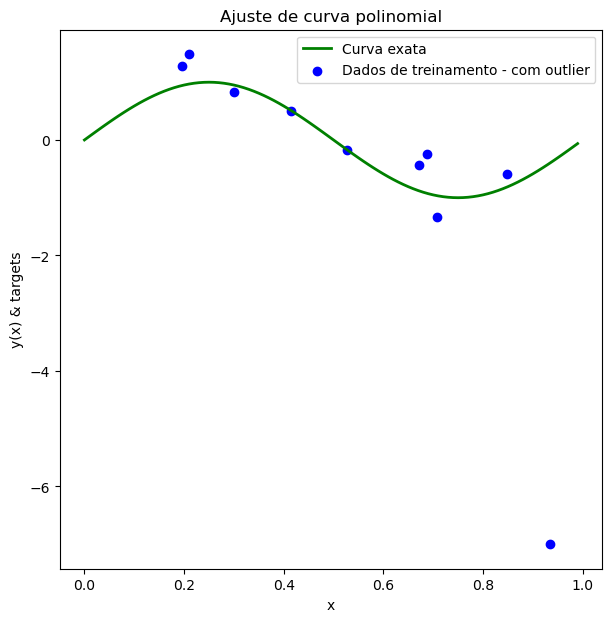

In [20]:
# Plot do problema
plt.figure (figsize=(7, 7))
plt.plot(x, y_f, color="green", linewidth=2, label = "Curva exata")
plt.scatter(X, t, color="blue", label = "Dados de treinamento - com outlier")
plt.xlabel("x")
plt.ylabel("y(x) & targets")
plt.legend()
plt.title("Ajuste de curva polinomial")
plt.show()

In [21]:
#Grau do polinômio
M = 3
#Definição da curva polinomial
poly_features = PolynomialFeatures(degree = M, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Regressão (aprendizado)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, t)
lin_reg.intercept_, lin_reg.coef_

(array([8.50308208]), array([[-54.00278641, 112.70128238, -76.414782  ]]))

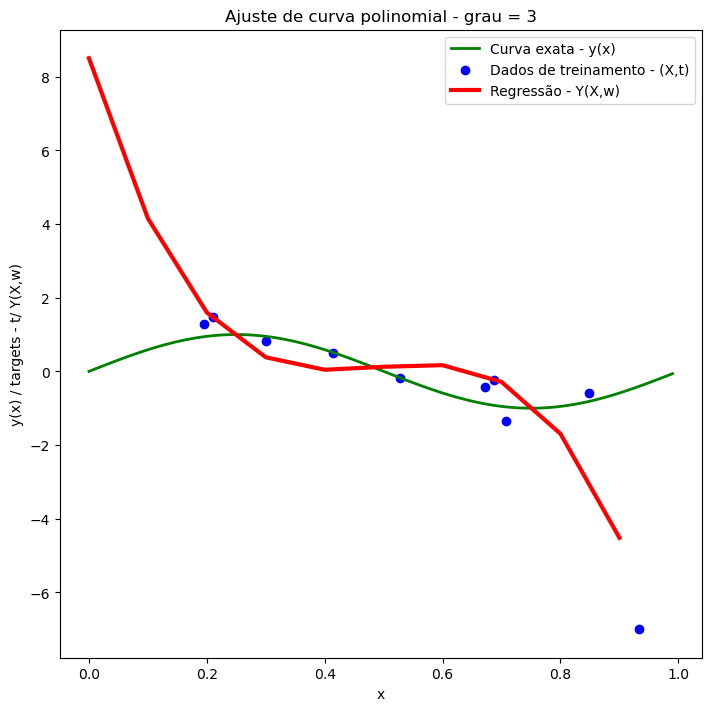

In [22]:
# Gera o y (x,w) estimado com os parâmetros ajustados
X_new = np.arange(0., 1., 1/N).reshape(N,1)  
Y = lin_reg.predict(poly_features.fit_transform(X_new))

#Figura 1.6 Bishop
fig, axs = plt.subplots(1, 1, figsize=(7, 7), layout='constrained')

axs.plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs.scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs.plot(X_new, Y, color="red", linewidth=3, label = "Regressão - Y(X,w)") 
axs.set_xlabel("x")  
axs.set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs.legend()
axs.set_title("Ajuste de curva polinomial - grau = " +str(M))
plt.show()